 # Problem Statement - Fantasy Sports Clustering Analysis
## Context:
Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


## Objective:
OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.


## Data Description:
* Player_Name: Name of the player.
* Club: Club in which the player plays.
* Position: Position in which the player plays.
* Goals_Scored: Number of goals scored by the player in the previous season.
* Assists: Number of passes made by the player leading to goals in the previous season.
* Total_Points: Total number of fantasy points scored by the player in the previous season.
* Minutes: Number of minutes played by the player in the previous season.
* Goals_Conceded: Number of goals conceded by the player in the previous season.
* Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
* Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
* Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals.
* Bonus: Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
* Clean_Sheets: Number of matches without conceding a goal in the previous season.

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df= pd.read_csv("fpl_data.csv")

In [3]:
df.sample(10)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
148,James McCarthy,Crystal Palace,Midfielder,0,0,26,816,15,87.2,112.2,10,0,2
449,Vladimir Coufal,West Ham United,Defender,0,9,128,3054,43,670.9,693.8,220,12,9
70,Joel Veltman,Brighton and Hove Albion,Defender,1,1,96,2280,27,366.0,484.4,169,10,9
143,Eberechi Eze,Crystal Palace,Midfielder,4,8,125,2555,51,653.1,516.2,383,17,6
19,Nicolas Pepe,Arsenal,Midfielder,10,3,114,1606,21,235.9,476.2,774,11,4
125,Karlo Ziger,Chelsea,Goalkeeper,0,0,0,0,0,0.0,0.0,0,0,0
163,Sam Woods,Crystal Palace,Defender,0,0,0,0,0,0.0,0.0,0,0,0
80,Solomon March,Brighton and Hove Albion,Midfielder,2,2,69,1670,25,414.3,368.6,322,6,7
390,William Smallbone,Southampton,Midfielder,0,0,5,171,5,7.4,16.8,9,0,0
44,Keinan Davis,Aston Villa,Forward,1,1,23,265,1,76.7,77.2,169,0,1


In [4]:
df.shape

(476, 13)

In [5]:
df['Player_Name'].nunique()

476

In [6]:
df['Club'].nunique()

17

In [7]:
df['Club'].value_counts()

Arsenal                     30
Crystal Palace              30
Leeds United                29
West Ham United             29
Tottenham Hotspurs          29
Newcastle United            29
Leicester City              29
Manchester United           28
Chelsea                     28
Brighton and Hove Albion    28
Everton                     27
Liverpool                   27
Manchester City             27
Southampton                 27
Burnley                     27
Aston Villa                 26
Wolverhampton Wanderers     26
Name: Club, dtype: int64

In [8]:
df['Position'].value_counts()

Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: Position, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


In [11]:
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
471    False
472    False
473    False
474    False
475    False
Length: 476, dtype: bool

## univarite and bivariate analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


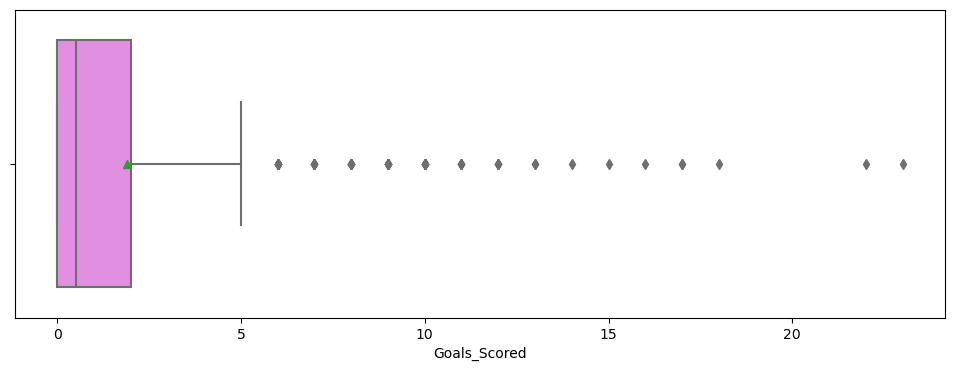

In [15]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Goals_Scored', showmeans=True,color='violet')
plt.show()

<Axes: xlabel='Goals_Scored', ylabel='Count'>

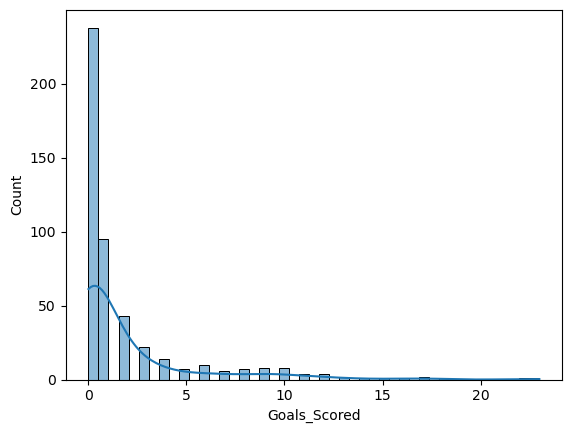

In [16]:
sns.histplot(data=df,x='Goals_Scored',kde=True)

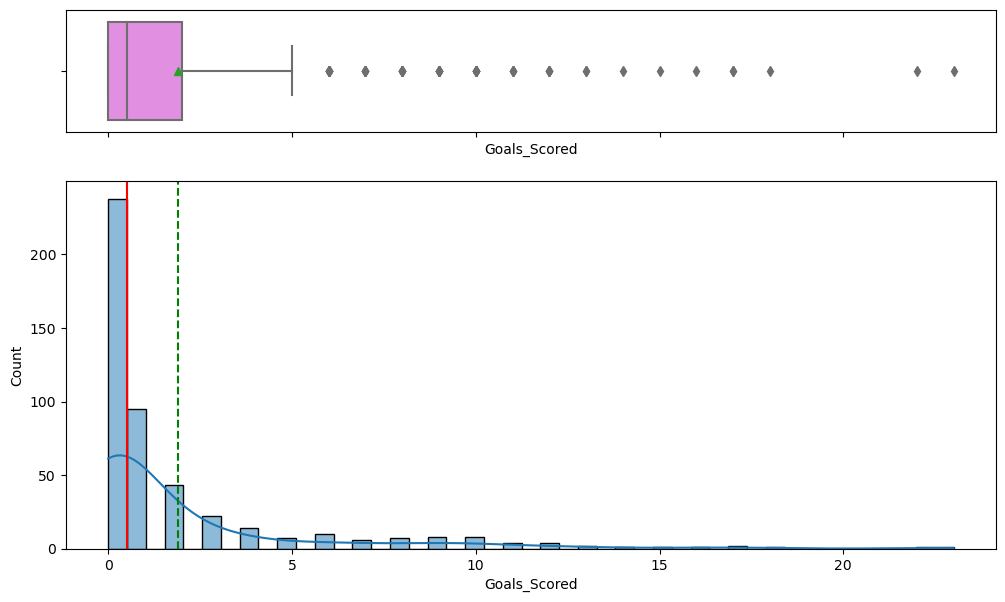

In [17]:
fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':(1,3)}, figsize=(12,7))
sns.boxplot(data=df, x='Goals_Scored', showmeans=True,color='violet',ax=ax[0])
sns.histplot(data=df,x='Goals_Scored',kde=True)
ax[1].axvline(df['Goals_Scored'].mean(),linestyle='--',color='Green')
ax[1].axvline(df['Goals_Scored'].median(),linestyle='-',color='Red')
plt.show()

In [18]:
def histogram_boxplot_fun(df,feature, kde=False,bins=23):
    fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':(1,3)}, figsize=(12,7))
    sns.boxplot(data=df, x=feature, showmeans=True,color='violet',ax=ax[0])
    sns.histplot(data=df,x=feature,kde=True)
    ax[1].axvline(df[feature].mean(),linestyle='--',color='Green')
    ax[1].axvline(df[feature].median(),linestyle='-',color='Red')

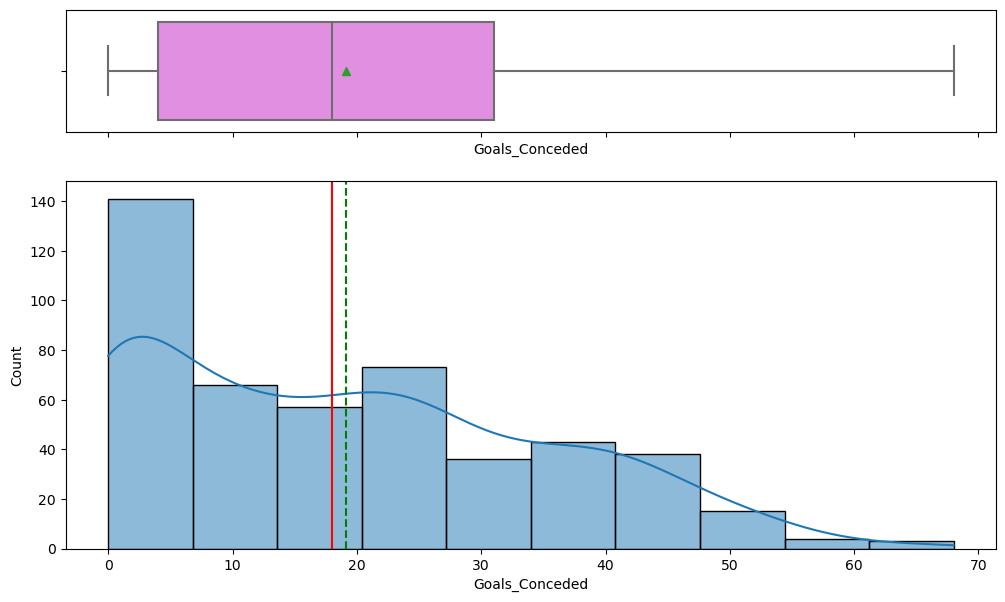

In [19]:
histogram_boxplot_fun(df,'Goals_Conceded',bins=10)

In [20]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


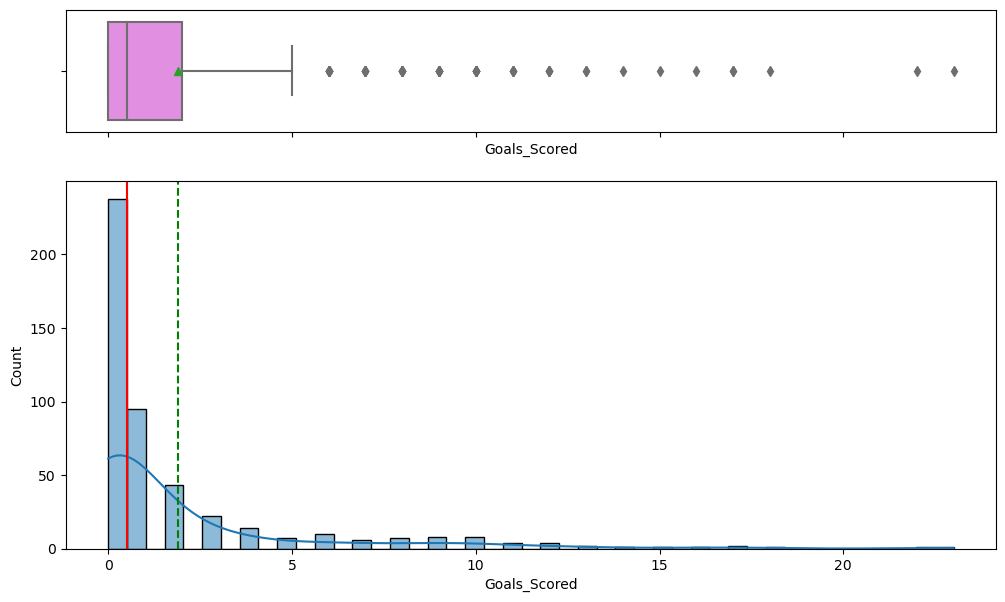

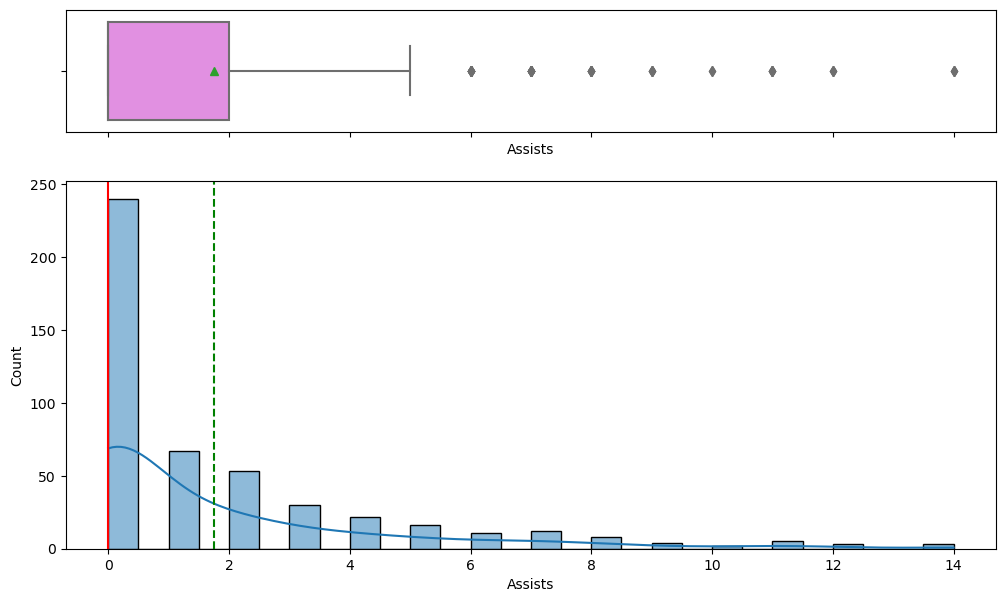

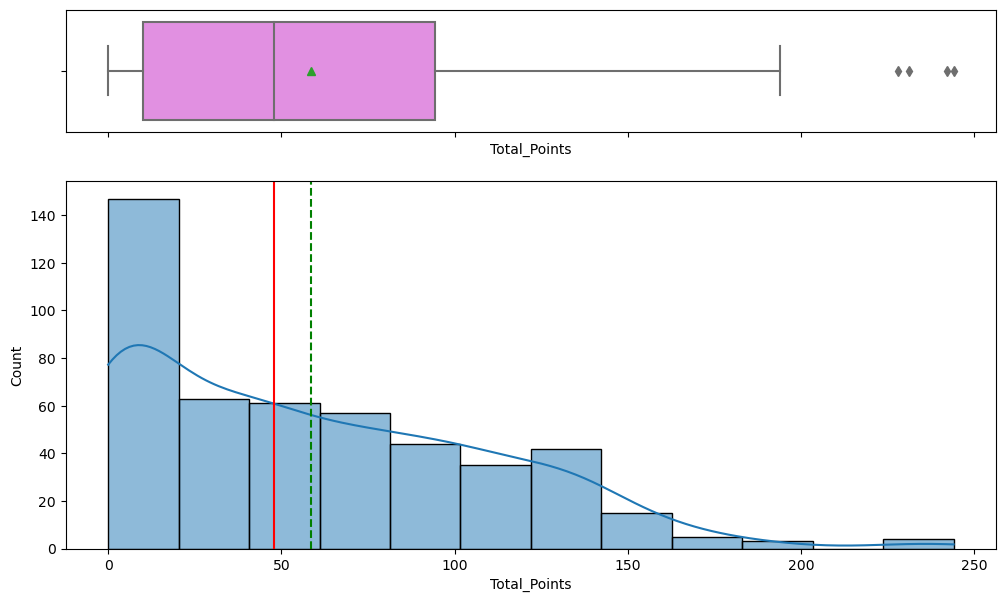

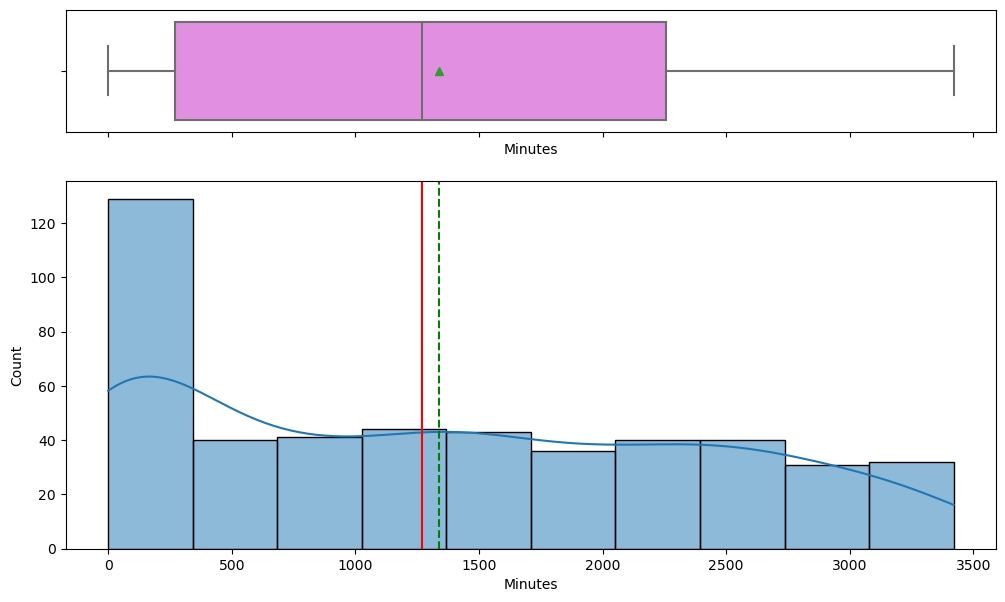

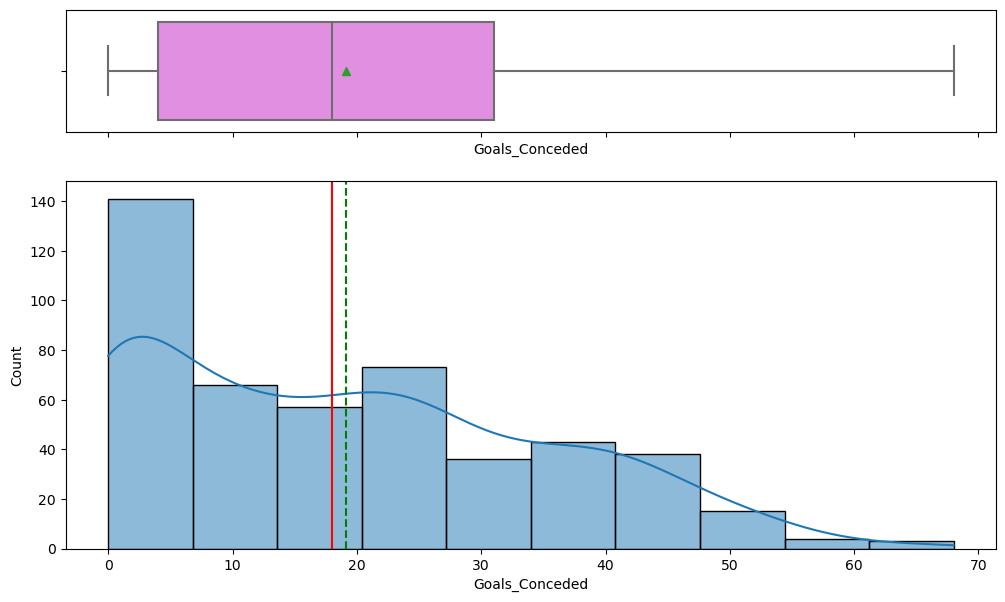

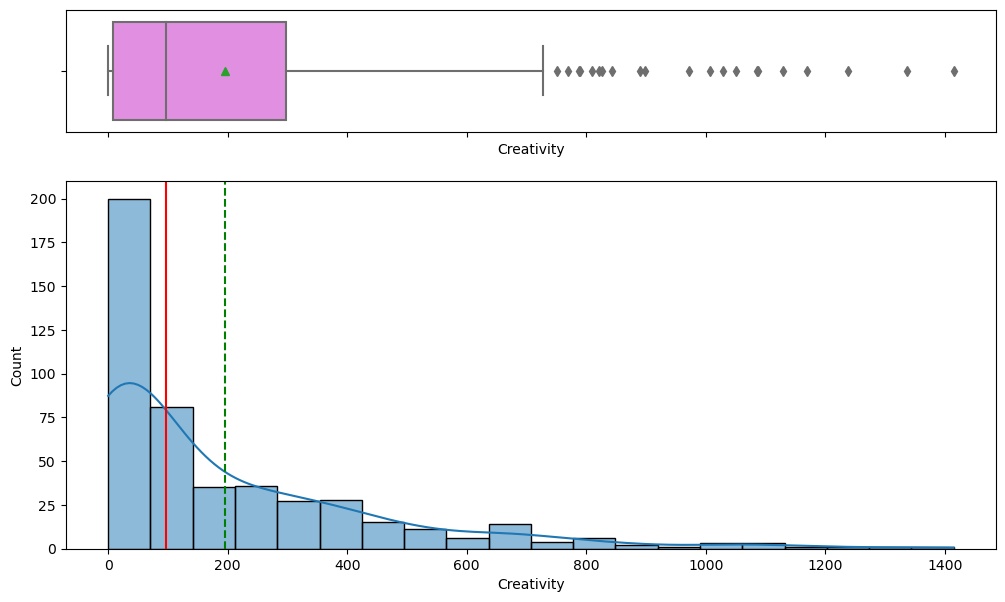

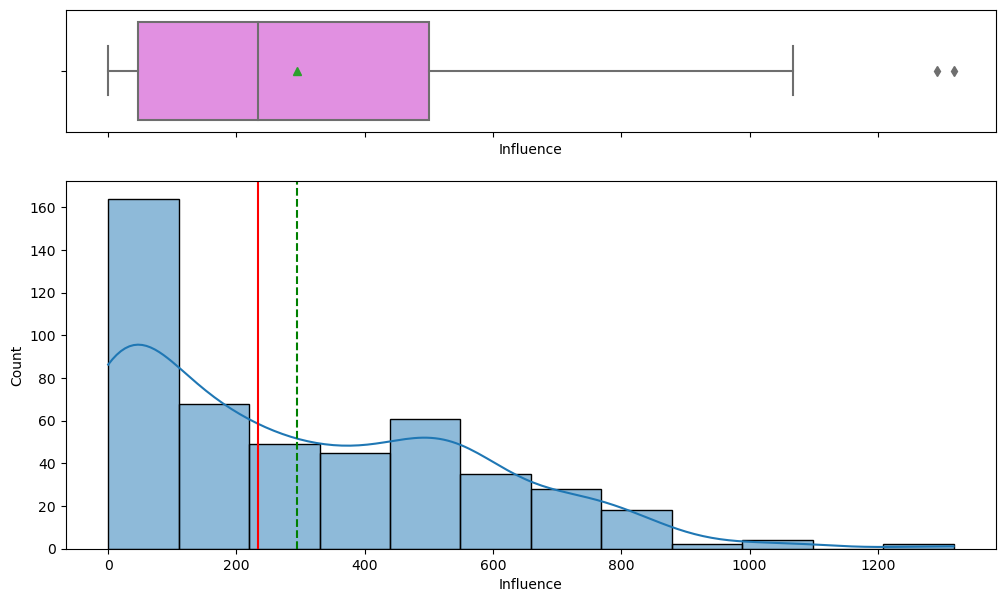

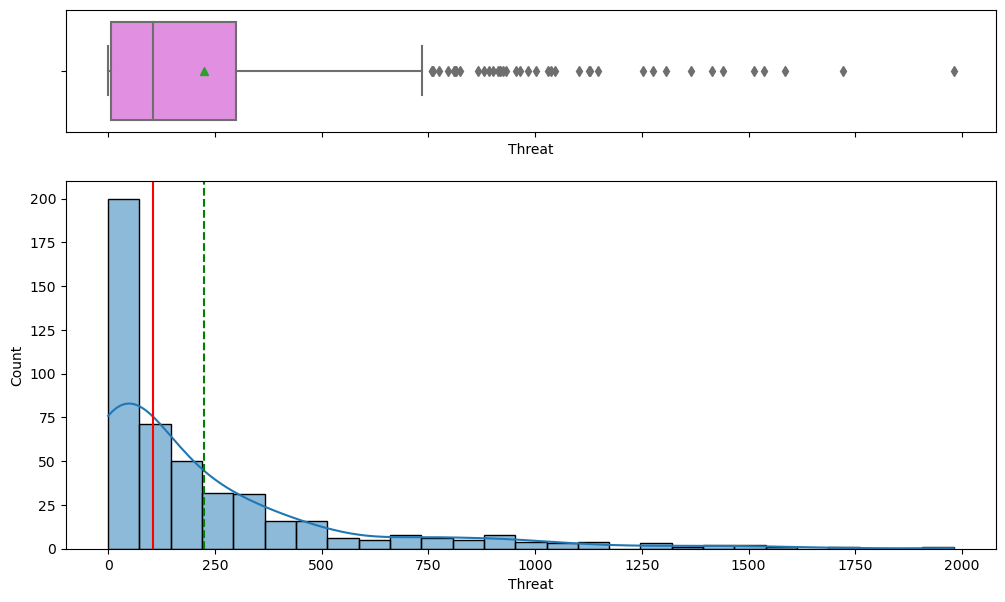

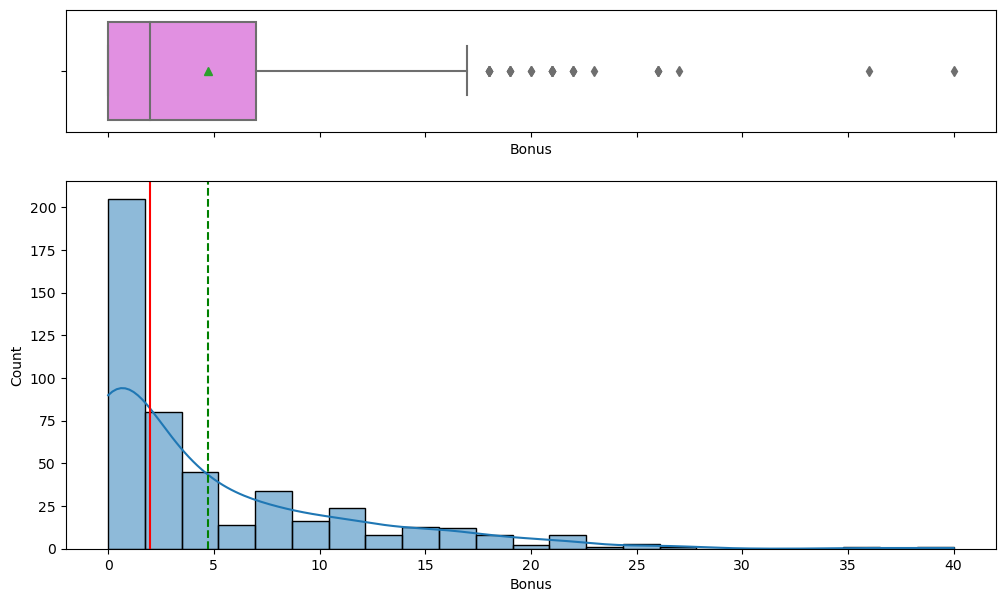

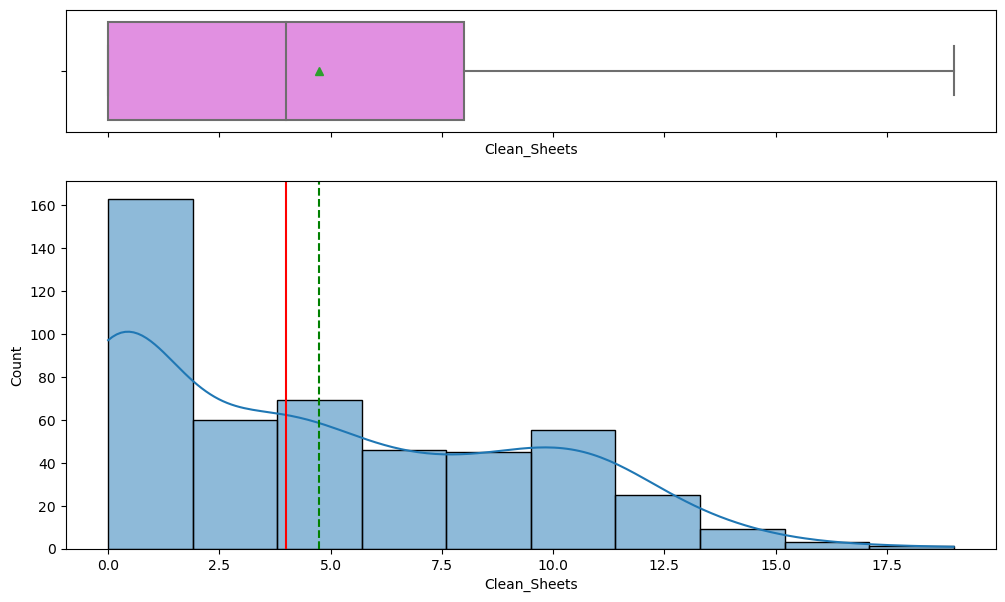

In [21]:
columns=['Goals_Scored','Assists','Total_Points','Minutes','Goals_Conceded','Creativity','Influence','Threat','Bonus','Clean_Sheets']

for col in columns:
    histogram_boxplot_fun(df,col)
 
    

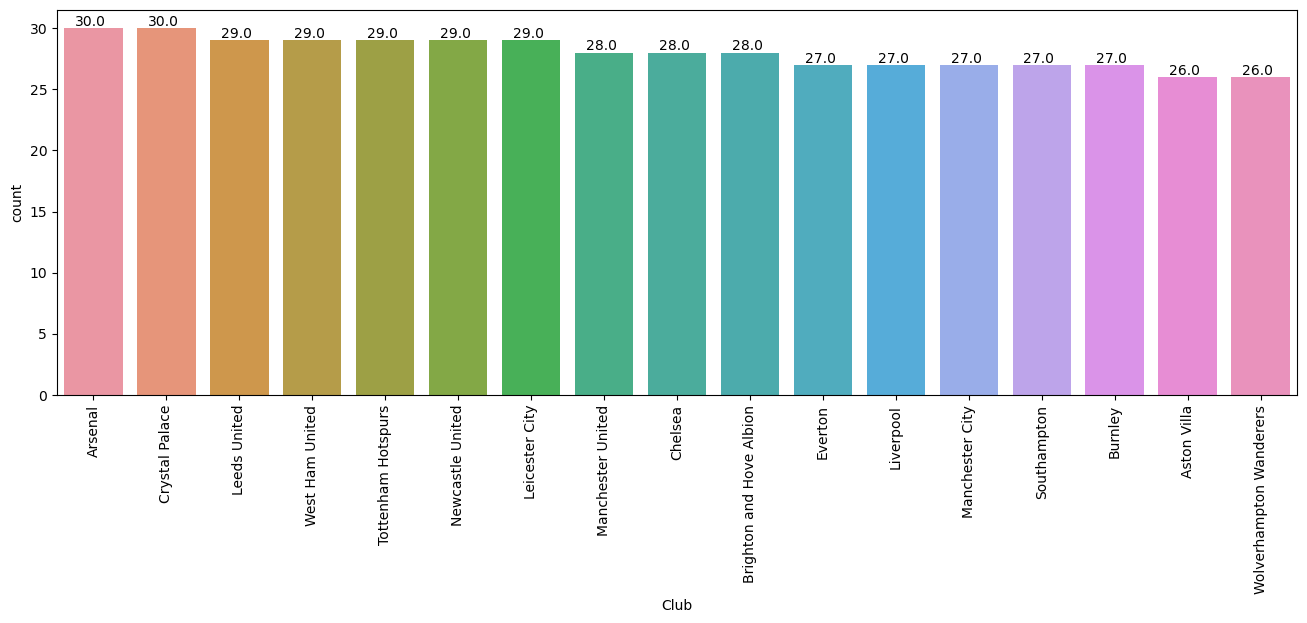

In [22]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=df, x='Club', order=df.groupby(['Club'])['Player_Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# Corrected loop
for i in range(len(ax.patches)):  # Use len(ax.patches) to get the number of bars
    x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2 - 0.25
    y = ax.patches[i].get_height() + .2
    ax.annotate(ax.patches[i].get_height(), (x, y))

plt.show()


In [23]:
df.groupby(['Club'])['Player_Name'].count().sort_values(ascending=False).index

Index(['Arsenal', 'Crystal Palace', 'Leeds United', 'West Ham United',
       'Tottenham Hotspurs', 'Newcastle United', 'Leicester City',
       'Manchester United', 'Chelsea', 'Brighton and Hove Albion', 'Everton',
       'Liverpool', 'Manchester City', 'Southampton', 'Burnley', 'Aston Villa',
       'Wolverhampton Wanderers'],
      dtype='object', name='Club')

In [24]:
ax.patches

<Axes.ArtistList of 17 patches>

In [25]:
def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

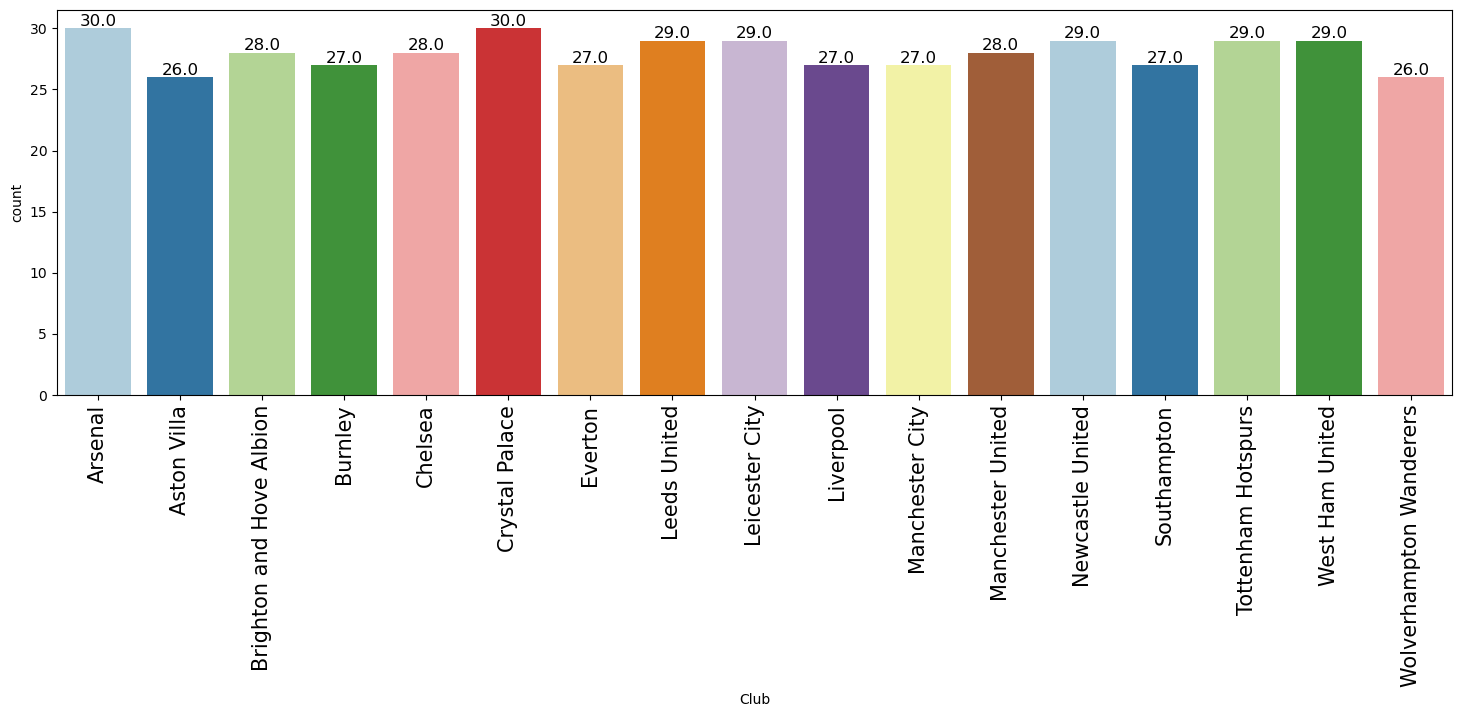

In [26]:
labeled_barplot(df,'Club')

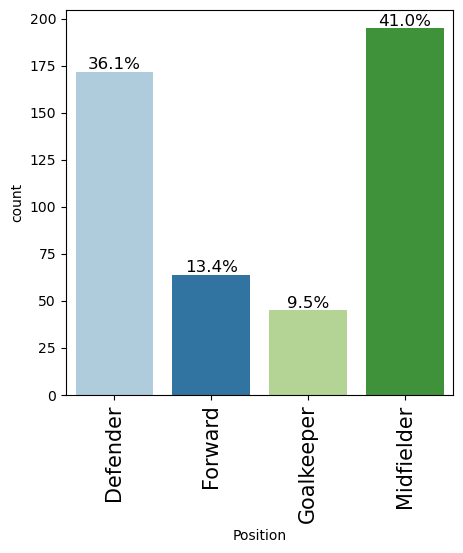

In [27]:
labeled_barplot(df,'Position',perc=True)

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_36872/2952466237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True)


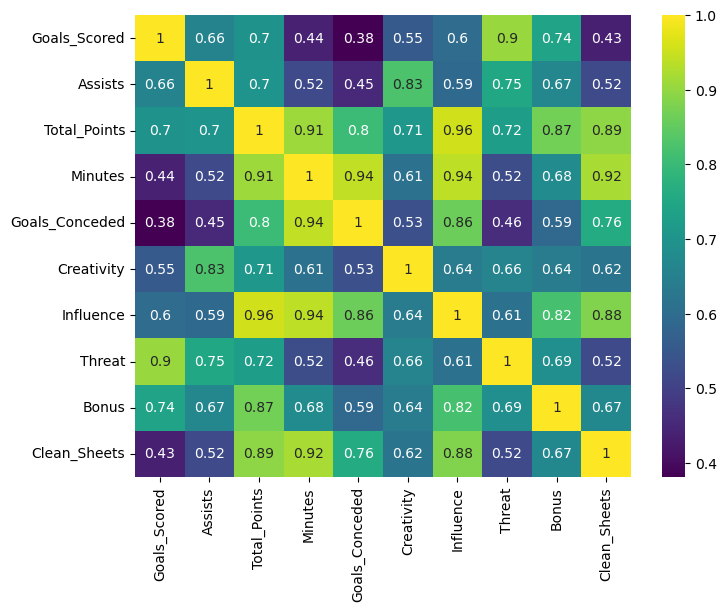

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_36872/2836064462.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df,x='Club',y='Total_Points',ci=95,order=df.groupby(['Club'])['Total_Points'].mean().sort_values(ascending= False).index)


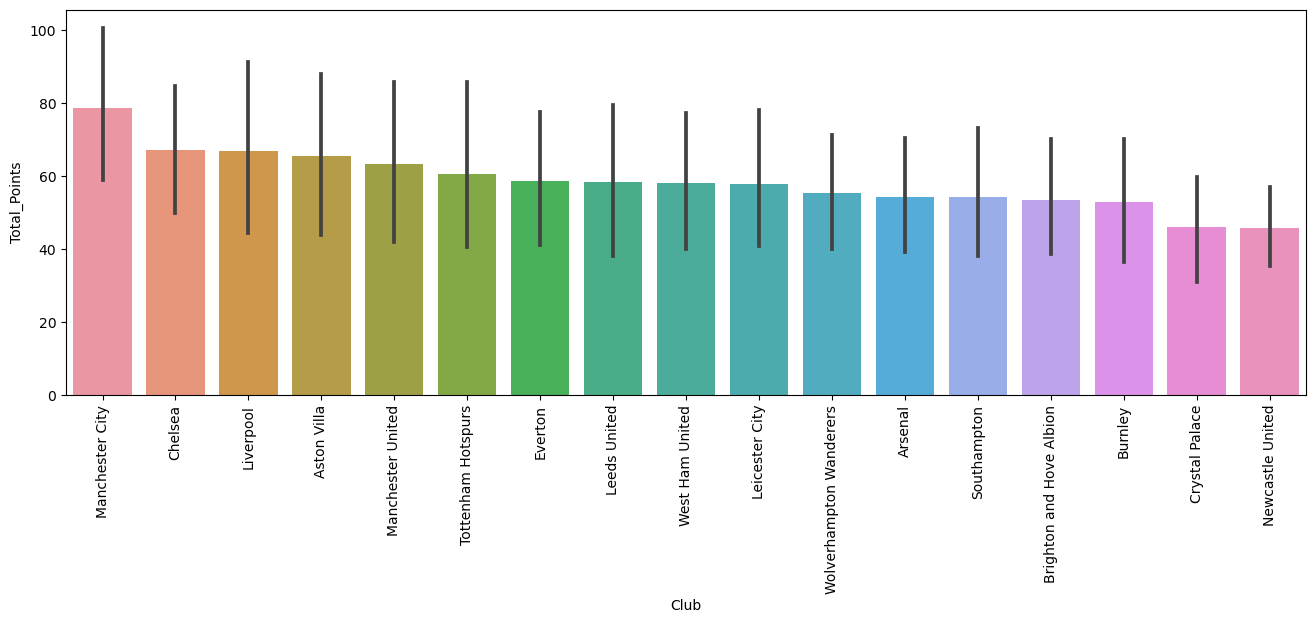

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(data=df,x='Club',y='Total_Points',ci=95,order=df.groupby(['Club'])['Total_Points'].mean().sort_values(ascending= False).index)
plt.xticks(rotation=90)
plt.show()

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_36872/2949624650.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df,x='Position',y='Total_Points',ci=95,order=df.groupby(['Position'])['Total_Points'].mean().sort_values(ascending= False).index)


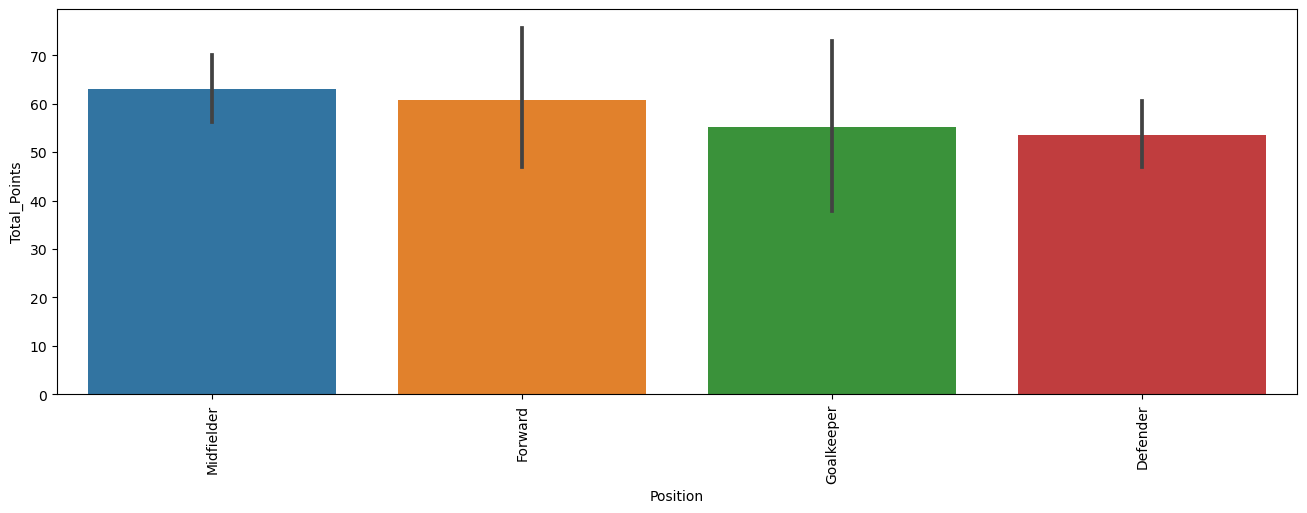

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(data=df,x='Position',y='Total_Points',ci=95,order=df.groupby(['Position'])['Total_Points'].mean().sort_values(ascending= False).index)
plt.xticks(rotation=90)
plt.show()

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_36872/1088564731.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df,x='Position',y='Minutes',ci=95,order=df.groupby(['Position'])['Minutes'].mean().sort_values(ascending= False).index)


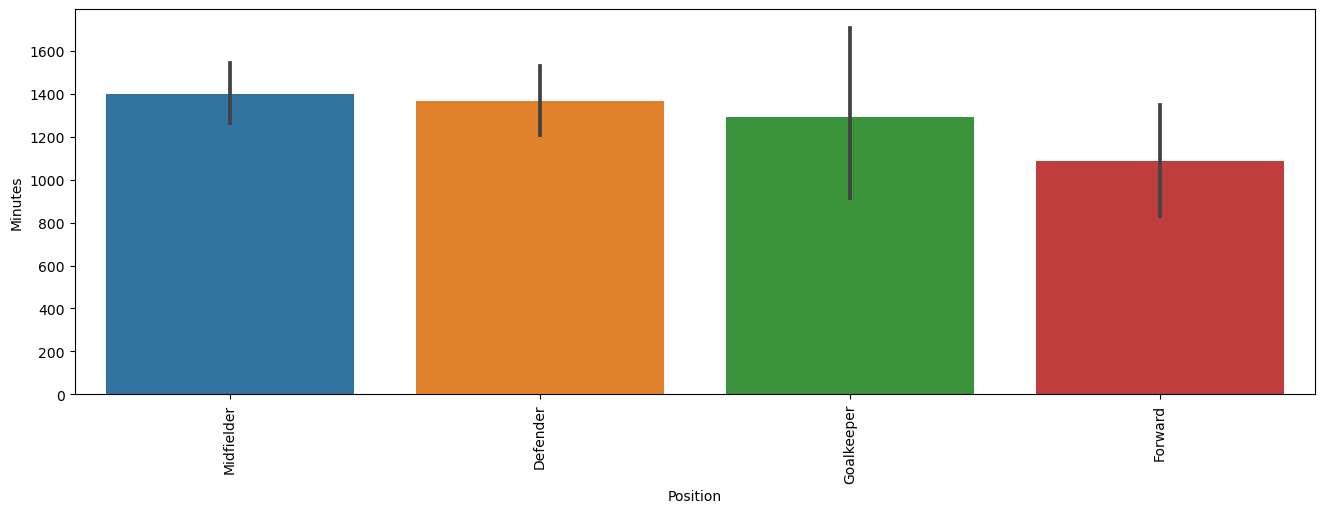

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(data=df,x='Position',y='Minutes',ci=95,order=df.groupby(['Position'])['Minutes'].mean().sort_values(ascending= False).index)
plt.xticks(rotation=90)
plt.show()

 top 3 players scored the most fantasy points last season for diff position of day 

In [32]:
df.groupby(['Position'])['Total_Points'].max()

Position
Defender      171
Forward       242
Goalkeeper    186
Midfielder    244
Name: Total_Points, dtype: int64

In [33]:
df_forward=df.iloc[df[df['Position']=='Forward']['Total_Points'].sort_values(ascending=False).index[:3]]

In [34]:
df_Goalkeeper=df.iloc[df[df['Position']=='Goalkeeper']['Total_Points'].sort_values(ascending=False).index[:3]]

In [35]:
df_Midfielder=df.iloc[df[df['Position']=='Midfielder']['Total_Points'].sort_values(ascending=False).index[:3]]

In [36]:
df_Defender=df.iloc[df[df['Position']=='Defender']['Total_Points'].sort_values(ascending=False).index[:3]]

In [37]:
df_highest=pd.concat([df_forward,df_Goalkeeper,df_Midfielder,df_Defender])

In [38]:
df_highest

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15
284,Ederson Moares,Manchester City,Goalkeeper,0,1,160,3240,28,10.0,586.0,0,3,19
203,Illan Meslier,Leeds United,Goalkeeper,0,0,154,3150,52,10.0,1026.0,0,20,11
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13
223,Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.6,756.8,527,15,12


In [39]:
num_cols=df.select_dtypes(np.number).columns.values

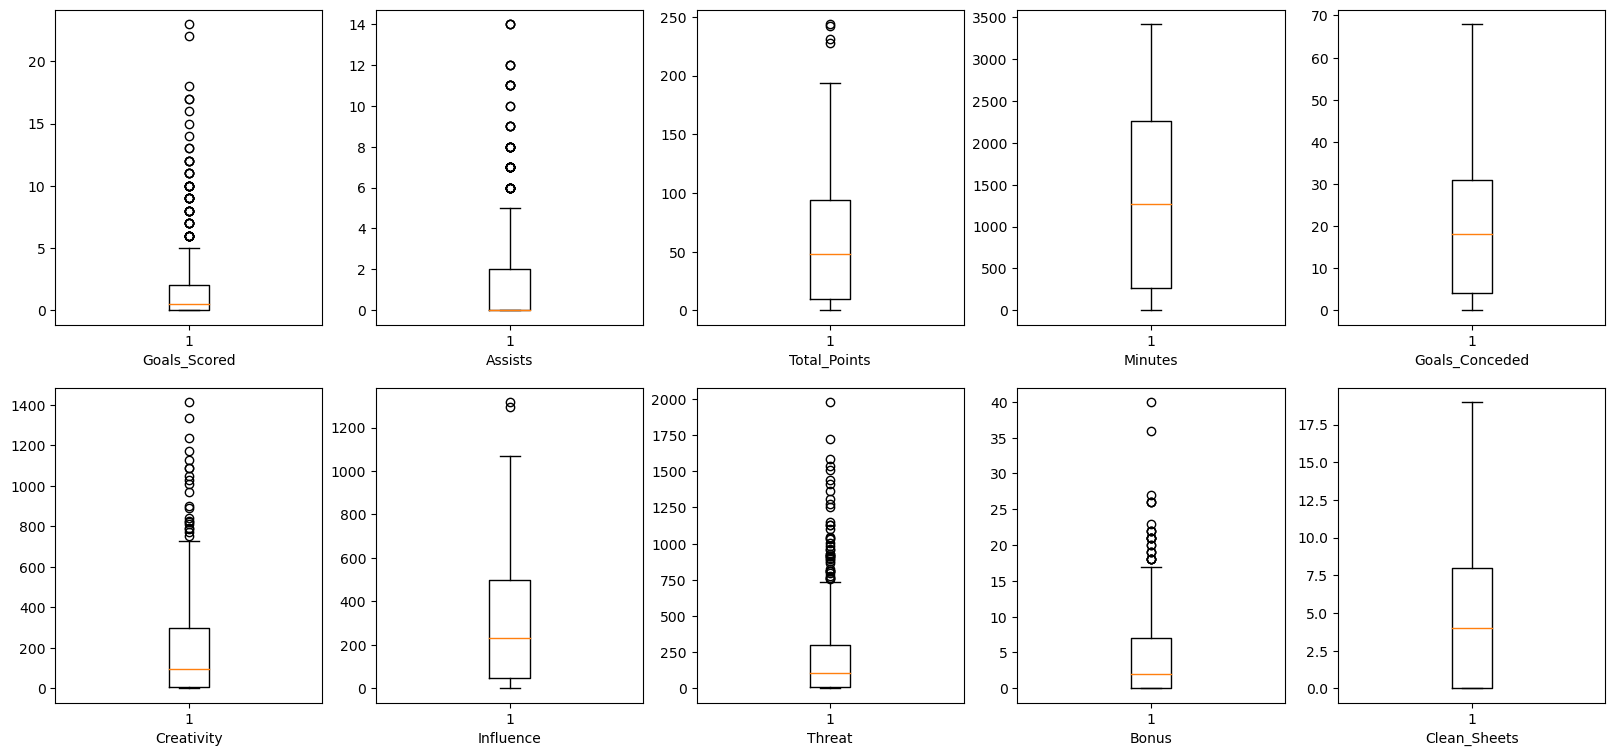

In [40]:
plt.figure(figsize=(20,9))
for i, j in enumerate(num_cols):
    plt.subplot(2,5, i+1)
    plt.boxplot(df[j])
    plt.xlabel(j)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()


In [43]:
scaler.fit(df[num_cols])
scaled_df=scaler.transform(df[num_cols])

In [44]:
scaled_df=pd.DataFrame(scaled_df,columns=num_cols)

In [45]:
scaled_df

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


In [46]:
#this is linear transformation 

In [47]:
#lets do pca

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=scaled_df.shape[1],random_state=0)

pca.fit(scaled_df)
pca_df=pca.transform(scaled_df)

In [49]:
pca_df=pd.DataFrame(pca_df)

In [50]:
pca_df

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877
...,...,...,...,...,...,...,...,...,...,...
471,-2.686929,0.350179,0.012579,-0.028976,-0.226985,-0.079117,-0.016498,-0.025886,0.114191,0.056974
472,2.333559,-3.137873,-1.051056,0.486420,-0.652311,0.294376,0.067490,0.094238,-0.214251,0.007010
473,-1.966630,0.469243,0.474989,-0.098289,-0.221093,-0.163924,-0.057647,0.129321,-0.267969,-0.017272
474,-0.818000,0.180940,0.103096,-0.112637,0.423414,-0.064093,0.399416,-0.300399,-0.000771,-0.068806


In [51]:
# first column has maximum variance and last column has least variance

pca_df.var()

0    7.230083
1    1.368810
2    0.589241
3    0.314499
4    0.227933
5    0.152593
6    0.070226
7    0.039455
8    0.019494
9    0.008719
dtype: float64

In [52]:
pca.explained_variance_ratio_

array([0.72148934, 0.13659346, 0.05880028, 0.03138379, 0.02274545,
       0.01522727, 0.00700781, 0.00393725, 0.00194529, 0.00087005])

In [53]:
sum(pca.explained_variance_ratio_[:5])

0.9710123249796079

## k means clustering

In [54]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
model.fit(pca_df)

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [55]:
model.predict(pca_df)

array([0, 3, 1, 3, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 3, 0, 3,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 3, 3, 0, 0, 1, 1, 1, 0, 3, 0, 0, 3, 0,
       0, 0, 2, 0, 1, 1, 0, 4, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 3,
       0, 0, 0, 0, 1, 0, 3, 1, 2, 3, 3, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       1, 1, 3, 0, 3, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       0, 2, 2, 3, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 3, 2, 2,
       2, 3, 2, 1, 3, 0, 0, 3, 1, 3, 0, 3, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 3, 1, 2, 2, 2, 0, 1, 0,
       0, 4, 0, 3, 3, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 0, 2, 2, 2, 0, 2,
       1, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 1, 4,
       3, 2, 3, 3, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 3, 4, 1, 1, 3,
       0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 3, 0, 2, 2, 2, 0, 1,
       1, 2, 0, 2, 0, 4, 0, 2, 0, 0, 0, 3, 4, 2, 3, 0, 0, 2, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 1, 3, 2, 0, 0, 0, 0, 2, 3, 3,

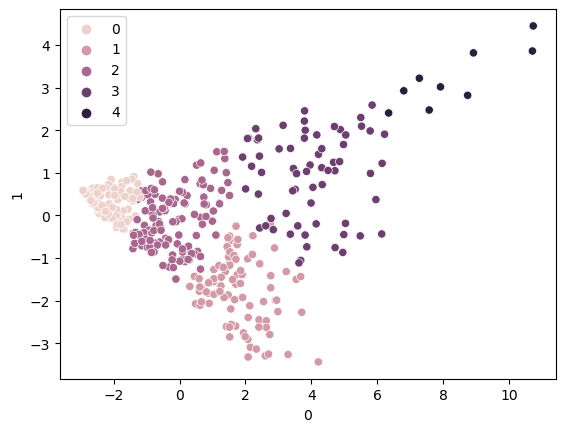

In [56]:


# Assuming pca_df is your DataFrame and you want to plot the first two principal components
sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1],hue=model.predict(pca_df))
plt.show()


## elbow analysis 

In [57]:
from scipy.spatial.distance import cdist
clusters_=range(1,10)
distortion=[]#distortion is finding centre, lets find distance between each point and centre and get sum of value, if value is small good clusters

for k in clusters_:
    model=KMeans(n_clusters=k)
    model.fit(pca_df)
    Y=model.predict(pca_df)
    
    distortion.append(sum(np.min(cdist(pca_df,model.cluster_centers_),axis=1))/pca_df.shape[0])

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [58]:
distortion

[2.7730371100978024,
 1.8635736785898265,
 1.5612774038101602,
 1.3542782238901416,
 1.2931541699741684,
 1.2242272213869854,
 1.1600698638408657,
 1.1179419162347282,
 1.0767980143438167]

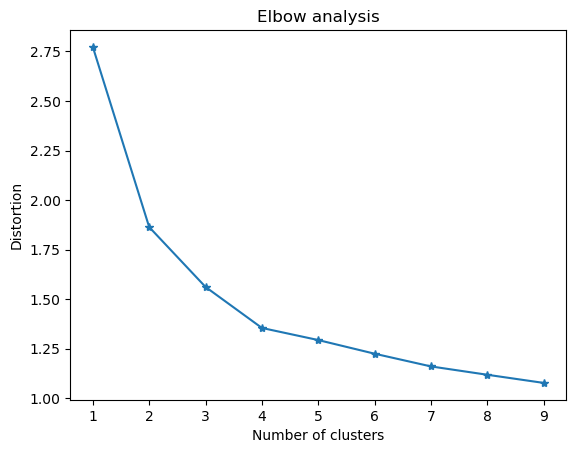

In [59]:
plt.plot(clusters_,distortion,'*-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow analysis')
plt.show()

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


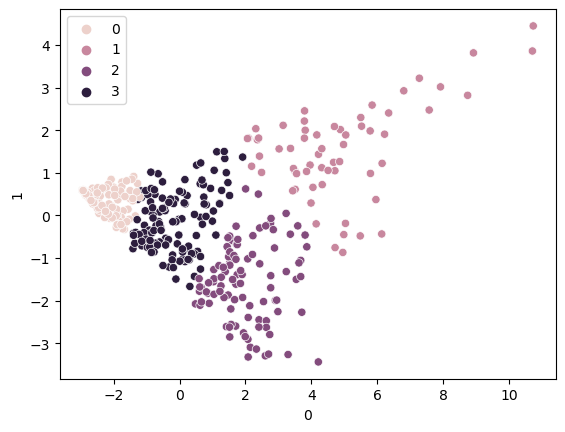

In [60]:
model=KMeans(n_clusters=4)
model.fit(pca_df)

sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1],hue=model.predict(pca_df))
plt.show()

In [61]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


In [62]:
scaled_df.head(1) #standard scaler

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123


In [63]:
pca_df.head(1) # 2 transformation 

,0,1,2,3,4,5,6,7,8,9
0,-2.9166,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269


In [64]:
model_kmeans=model

In [65]:
df_kmeans=scaled_df.copy()
df_kmeans['labels']=model.labels_

In [66]:
df_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,0
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,1
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,2
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,1
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,3
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,0
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,2
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,0
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,3


In [67]:
cluster_kmeans=df_kmeans.groupby('labels').mean()
cluster_kmeans['count']=df_kmeans.groupby('labels')['Goals_Scored'].count().values

In [68]:
cluster_kmeans.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
2,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
3,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128


In [69]:
cluster_kmeans.style.highlight_min(color='lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
2,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
3,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128


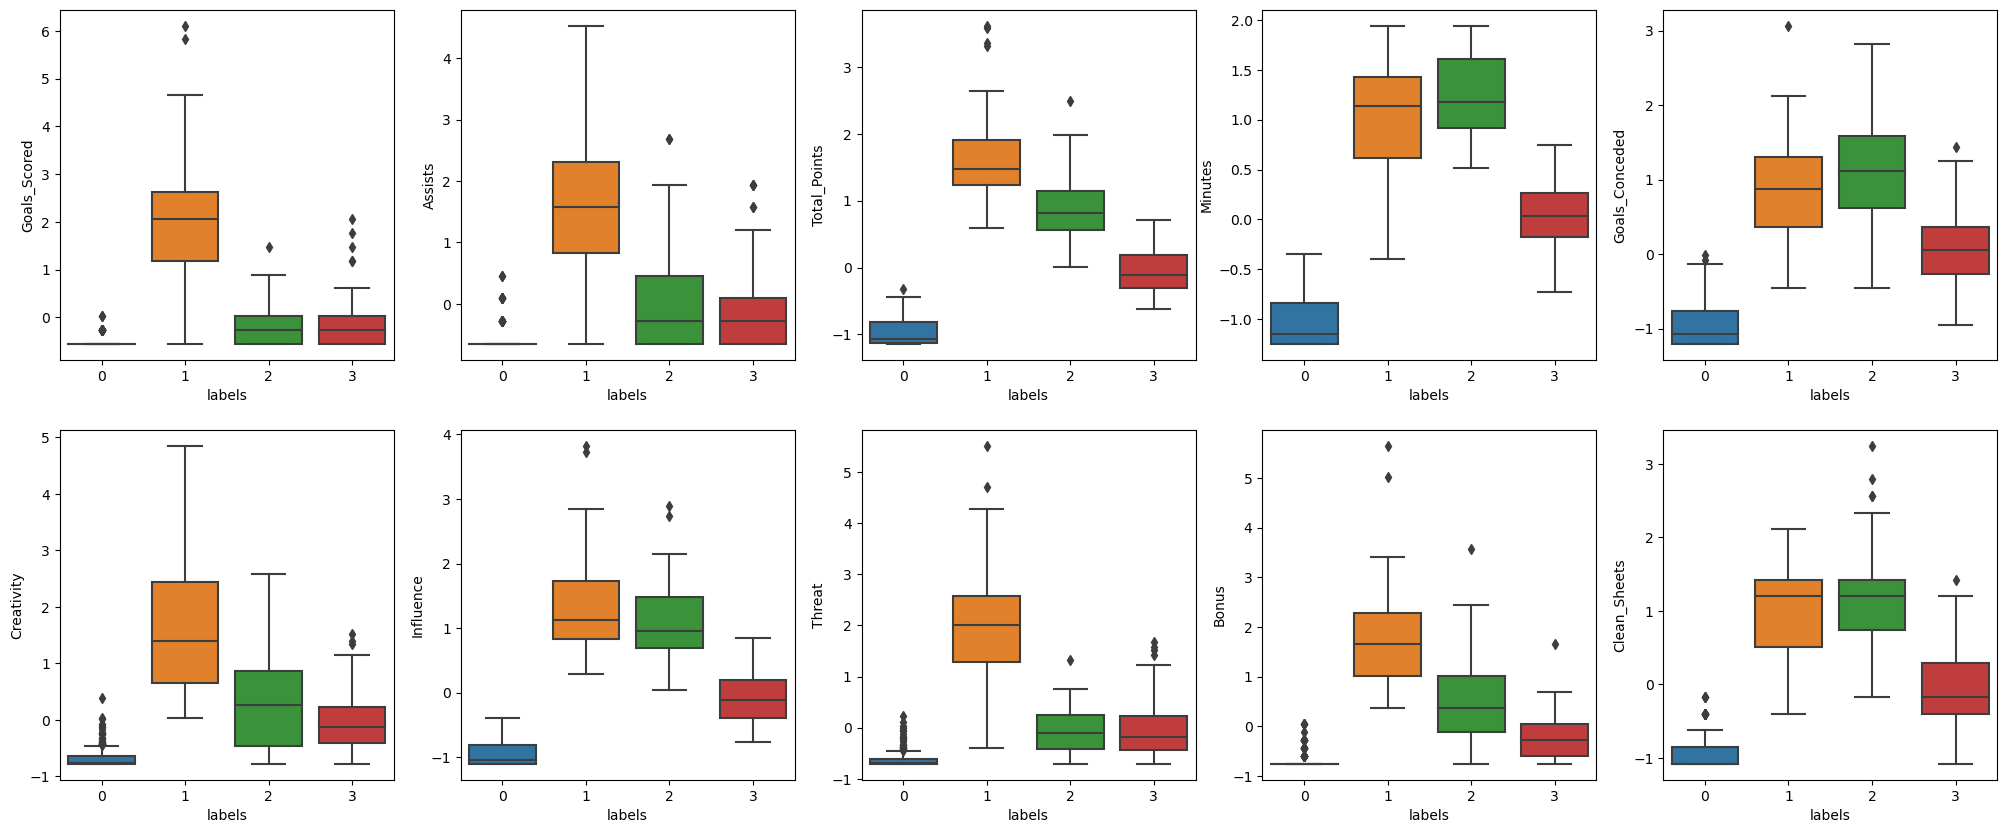

In [70]:
fig,ax=plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        sns.boxplot(data=df_kmeans,x='labels',y=num_cols[5*i+j],ax=ax[i][j])


In [71]:
from sklearn_extra.cluster import KMedoids

In [72]:
model_kmedoids=KMedoids(n_clusters=4,random_state=0)
model_kmedoids.fit(pca_df)

KMedoids(n_clusters=4, random_state=0)

In [73]:
model_kmedoids

KMedoids(n_clusters=4, random_state=0)

In [74]:
model_kmedoids.predict(pca_df)

array([3, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 3,
       3, 3, 2, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1, 2, 2, 2, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 2,
       1, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 3,
       2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 2, 3, 2, 0, 0,

In [75]:
model_kmedoids.labels_

array([3, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 3,
       3, 3, 2, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1, 2, 2, 2, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 2,
       1, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 3,
       2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 2, 3, 2, 0, 0,

In [76]:
pd.DataFrame(model_kmedoids.cluster_centers_) #pca /std

,0,1,2,3,4,5,6,7,8,9
0,3.510462,0.613016,0.517543,0.416560,0.191936,-0.405614,-0.116210,-0.279499,-0.004610,0.033056
1,1.672802,-1.977894,-0.210775,0.195068,0.267424,0.657495,0.063915,0.153208,0.127187,-0.002233
2,-0.602559,0.081585,0.174035,-0.050390,0.372458,-0.167053,0.230252,-0.107574,-0.052573,0.026930
3,-2.879568,0.536520,-0.041019,0.160248,-0.023890,0.007384,-0.032287,0.029865,0.025391,0.016262


In [77]:
pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)),columns=num_cols)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,6.000000e+00,5.000000e+00,122.0,2244.0,29.0,644.2,530.6,5.100000e+02,13.0,1.000000e+01
1,6.661338e-16,2.000000e+00,100.0,2683.0,35.0,84.3,610.4,1.520000e+02,7.0,1.100000e+01
2,1.000000e+00,1.000000e+00,48.0,1108.0,14.0,210.6,170.6,2.350000e+02,3.0,5.000000e+00
3,-2.220446e-16,-4.440892e-16,3.0,45.0,1.0,1.0,11.6,-8.526513e-14,0.0,1.776357e-15


In [78]:
df[(df['Goals_Scored']==6)&(df['Total_Points']==122)]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
179,Gylfi Sigurdsson,Everton,Midfielder,6,5,122,2244,29,644.2,530.6,510,13,10


In [79]:
df_kmedoids=scaled_df.copy()

In [80]:
df_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


In [81]:
df_kmedoids['labels']=model_kmedoids.labels_

In [82]:
profile_kmedoids=df_kmedoids.groupby('labels').mean()

In [83]:
profile_kmedoids['count']=df_kmedoids.groupby('labels')['Goals_Scored'].count().values

In [84]:
profile_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


In [85]:
profile_kmedoids.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


In [86]:
profile_kmedoids.style.highlight_min()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


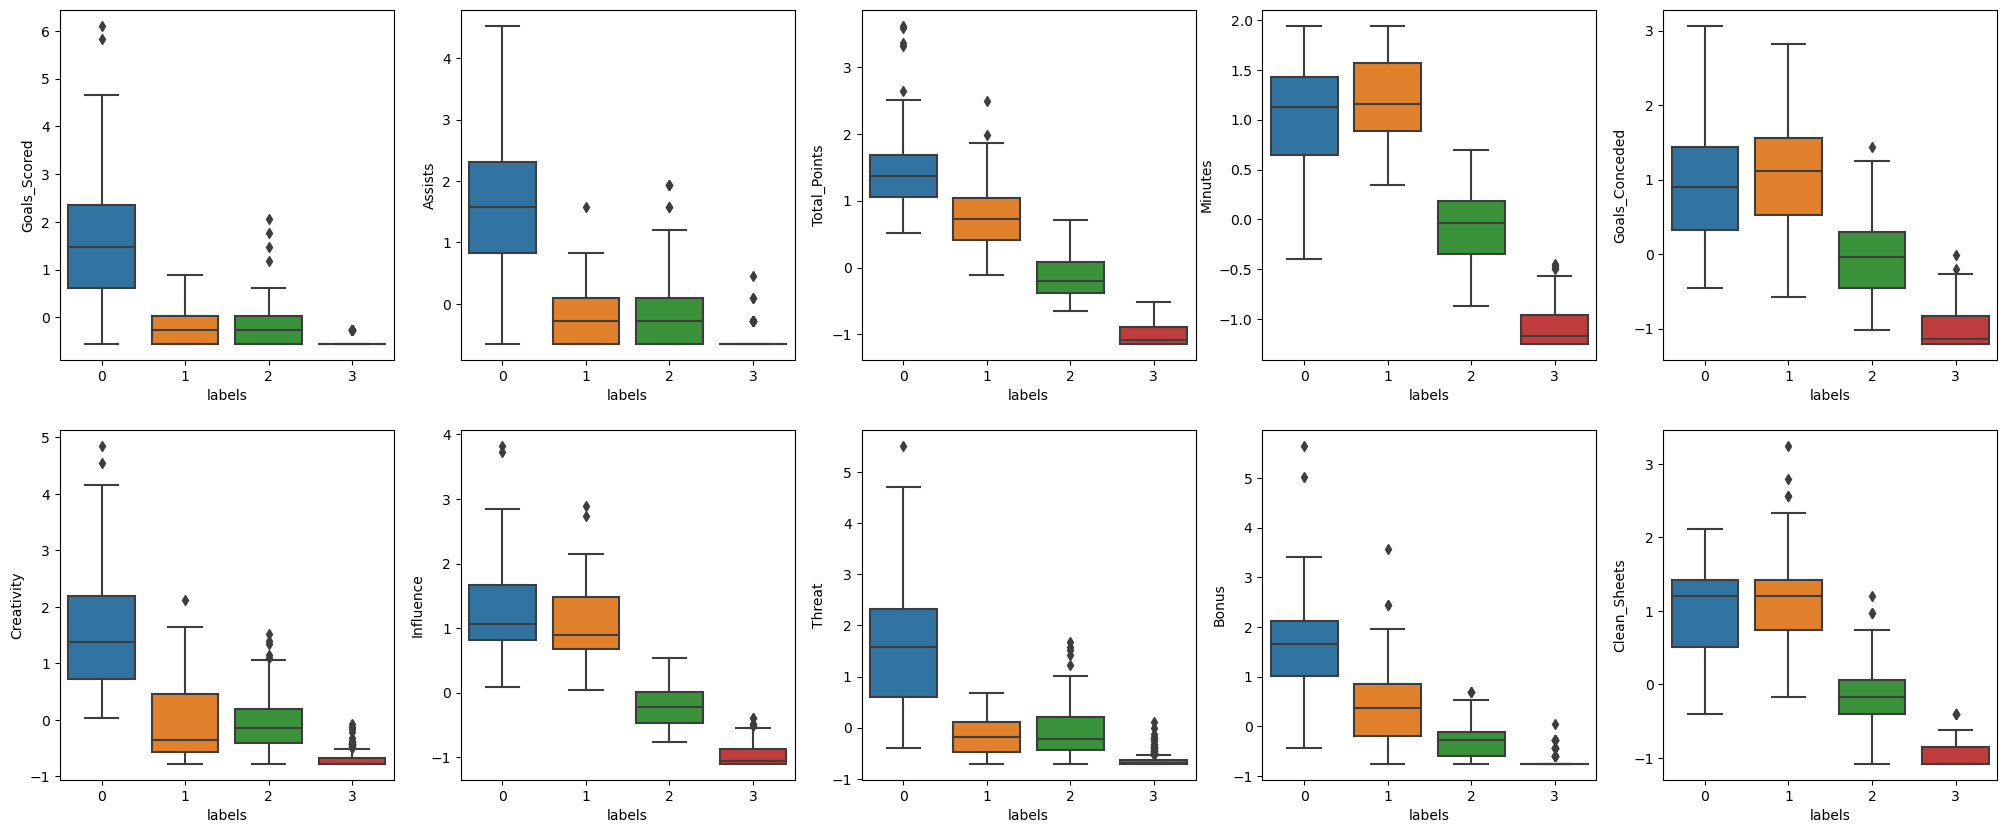

In [87]:
fig,ax=plt.subplots(2,5,figsize=(25,10))

for i in range(2):
    for j in range(5):
        sns.boxplot(data=df_kmedoids,x='labels',y=num_cols[5*i+j],ax=ax[i][j])

In [88]:
from sklearn.cluster import AgglomerativeClustering

model_gg=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')

In [89]:
model_gg.fit(pca_df)

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

<Axes: xlabel='0', ylabel='1'>

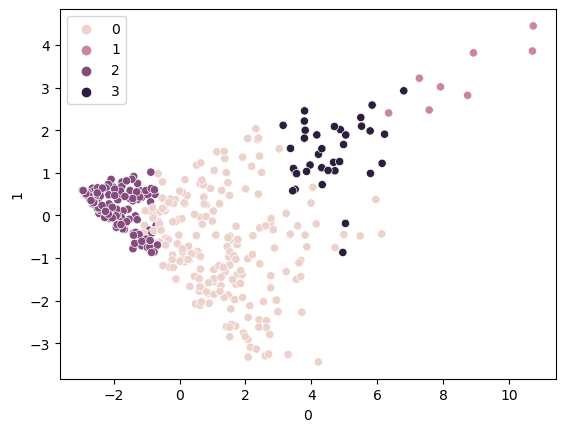

In [90]:
sns.scatterplot(data=pca_df,x=0,y=1,hue=model_gg.labels_)

In [91]:
df_agg=scaled_df.copy()
df_agg['labels']=model_gg.labels_
df_agg

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,2
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,3
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,0
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,3
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,2
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,0
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,0


In [92]:
profile_agg=df_agg.groupby('labels').mean()
profile_agg['count']=df_agg.groupby('labels')['Goals_Scored'].count().values

In [93]:
profile_agg

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.006329,0.151459,0.539433,0.712591,0.671089,0.320806,0.586843,0.076662,0.305044,0.661053,210
1,4.589442,3.279317,2.905137,1.605111,1.394743,2.004162,2.621353,3.948614,3.467231,1.538650,8
2,-0.475617,-0.544337,-0.860796,-0.895832,-0.816094,-0.630182,-0.846282,-0.568382,-0.659519,-0.863578,222
3,1.950018,1.744500,1.515967,1.010825,0.807953,1.569384,1.212964,2.180359,1.517111,1.127333,36


In [94]:
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram

In [95]:
from scipy.spatial.distance import pdist

In [96]:
z=linkage(pca_df,method='complete',metric='euclidean')

In [97]:
pd.DataFrame(z,columns=['node1','node2','distance','group_size'])

,node1,node2,distance,group_size
0,69.0,335.0,0.000000,2.0
1,396.0,476.0,0.000000,3.0
2,16.0,17.0,0.000000,2.0
3,26.0,478.0,0.000000,3.0
4,28.0,479.0,0.000000,4.0
...,...,...,...,...
470,933.0,939.0,6.437897,8.0
471,944.0,945.0,7.911572,210.0
472,942.0,947.0,8.701364,246.0
473,913.0,948.0,10.186518,468.0


In [98]:
c,c_dist=cophenet(z,pdist(pca_df))

In [99]:
np.corrcoef(c_dist,pdist(pca_df))

array([[1.        , 0.74120413],
       [0.74120413, 1.        ]])

In [100]:
distance_=['euclidean', 'chebyshev', 'mahalanobis']
linkage_=['single','complete','average']

c_max=-float('inf')
for i in distance_:
    for j in linkage_:
        
        z=linkage(pca_df,metric=i,method=j)
        c,c_dist=cophenet(z,pdist(pca_df))
        print(c)
        if c > c_max:
            c_max=c
            idx_max=(i,j)

0.8430175514228705
0.7412041292261757
0.8476499945585418
0.8381223141111799
0.8028394390632132
0.8167064931302253
0.8065008904132245
0.6583135946489012
0.7747800632434055


In [101]:
c_max

0.8476499945585418

In [102]:
distance_=['euclidean']
linkage_=['single','complete','average','ward']

c_max=-float('inf')
for i in distance_:
    for j in linkage_:
        
        z=linkage(pca_df,metric=i,method=j)
        c,c_dist=cophenet(z,pdist(pca_df))
        print(c)
        if c > c_max:
            c_max=c
            idx_max=(i,j)

0.8430175514228705
0.7412041292261757
0.8476499945585418
0.577773844586155


In [103]:
z=linkage(pca_df,metric=idx_max[0],method=idx_max[1])

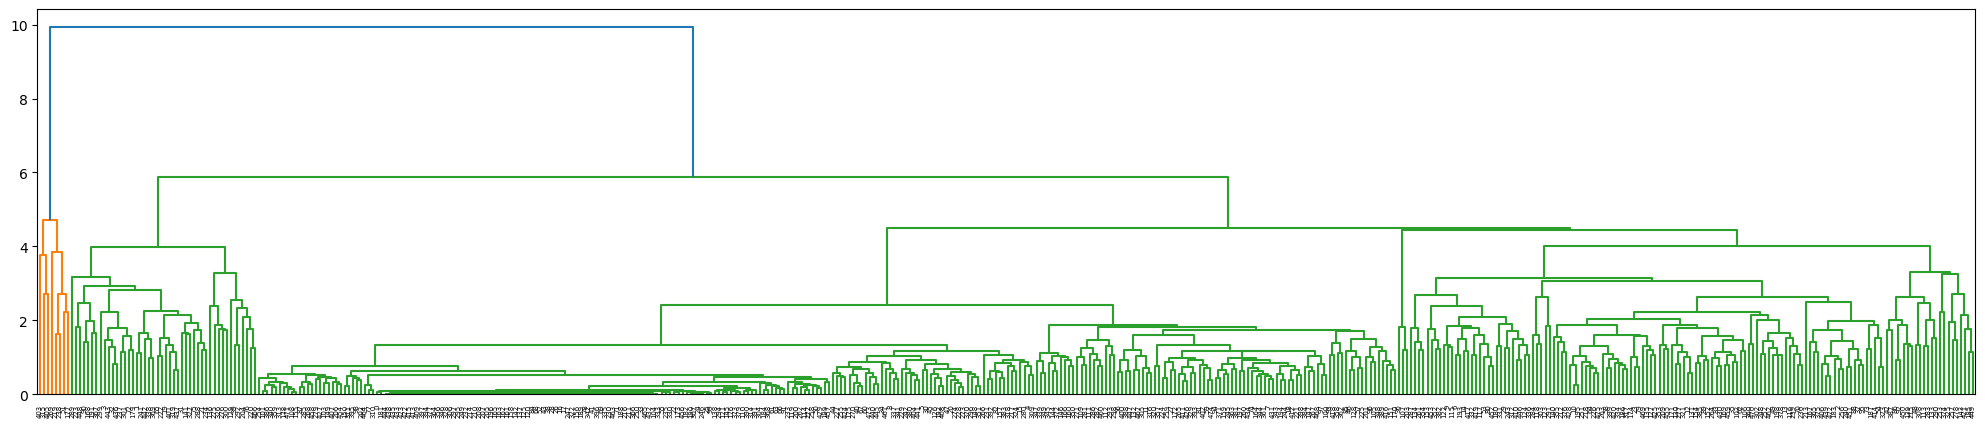

In [104]:
plt.figure(figsize=(25,5))
dendrogram(z);

In [105]:
from sklearn.mixture import GaussianMixture

In [106]:
model_gmm=GaussianMixture(n_components=4,random_state=0)
model_gmm.fit(pca_df)
model_gmm

GaussianMixture(n_components=4, random_state=0)

In [107]:
df_gmm=scaled_df.copy()

df_gmm['labels']=model_gmm.predict(pca_df)

In [108]:
df_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,1
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,2
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,1
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,2
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [109]:
profile_gmm=df_gmm.groupby('labels').mean()
profile_gmm['count']=df_gmm.groupby('labels')['Assists'].count().values

In [110]:
profile_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975,100
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743,138
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483,221
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951,17


In [111]:
from sklearn.cluster import DBSCAN

In [112]:
model_dbs=DBSCAN(eps=3,min_samples=10)

model_dbs.fit(pca_df)

DBSCAN(eps=3, min_samples=10)

In [113]:
model_dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0

<Axes: xlabel='0', ylabel='1'>

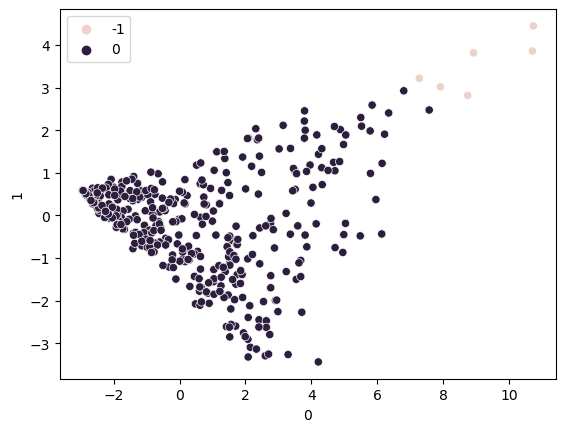

In [114]:
#-1 are outliers and we have only one cluster

sns.scatterplot(data=pca_df,x=0,y=1,hue=model_dbs.labels_)

In [115]:
from sklearn.metrics import silhouette_score

eps_=[0.5,1,2,3,4,5]
min_s=[3,5,10,15,20]

max_score=-float('inf')

for i in eps_:
    for j in min_s:
        
        model=DBSCAN(eps=i,min_samples=j).fit(pca_df)
        print(np.unique(model.labels_))
        if len (np.unique(model.labels_)) > 1:
            score=silhouette_score(pca_df,model.labels_)
            print(score)
            if score>max_score:
                max_score=score
                print(i,j)

[-1  0  1  2  3  4]
0.03706830550331133
0.5 3
[-1  0]
0.35051480671600904
0.5 5
[-1  0]
0.33561855552131503
[-1  0]
0.3165448080619693
[-1  0]
0.31273077193276516
[-1  0  1]
0.34619967136527213
[-1  0  1  2]
0.23844706230681398
[-1  0]
0.46081684603137557
1 10
[-1  0]
0.4637989004985352
1 15
[-1  0]
0.4600626781943459
[-1  0]
0.5719599278139529
2 3
[-1  0]
0.5258910630988771
[-1  0]
0.5240489367741041
[-1  0]
0.5122411697721749
[-1  0  1]
0.3647818750795434
[-1  0]
0.6376550045217626
3 3
[-1  0]
0.6242051898149511
[-1  0]
0.6188492415886241
[-1  0]
0.6188492415886241
[-1  0]
0.6188492415886241
[0]
[0]
[0]
[-1  0]
0.6626466090719034
4 15
[-1  0]
0.6626466090719034
[0]
[0]
[0]
[0]
[0]


In [117]:
model_dbs=DBSCAN(eps=4,min_samples=15).fit(pca_df)

<Axes: xlabel='0', ylabel='1'>

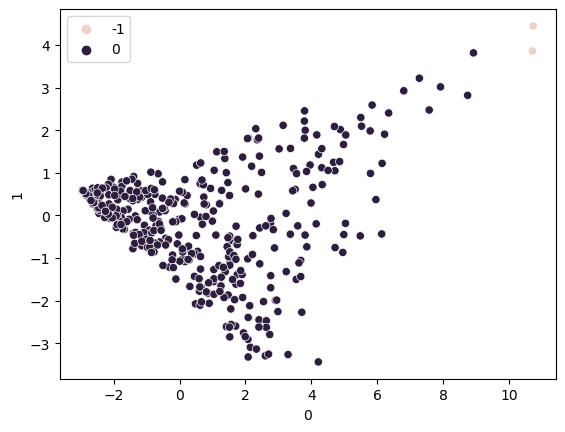

In [118]:
sns.scatterplot(data=pca_df,x=0,y=1,hue=model_dbs.labels_)

In [119]:
df_dbs=scaled_df.copy()

df_dbs['labels']=model_dbs.labels_

In [120]:
df_dbs[df_dbs['labels']==-1]

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
315,4.661866,4.526676,3.619915,1.644616,1.057317,4.852129,3.730800,3.233780,5.008204,1.880359,-1
403,6.110330,4.526676,3.580883,1.627835,1.245648,1.843542,3.826501,4.278114,5.648609,1.652553,-1


In [121]:
df.iloc[[315,403],:]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
